

##libary import



In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EDA

In [4]:
# Move the directory to the csv files
%cd /content/drive/MyDrive/NLP/csv

/content/drive/MyDrive/NLP/csv


In [5]:
df=pd.read_csv("Resume_dataset_final.csv")

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [10]:
ls


aclImdb/                           out.png
aclImdb_v1.tar.gz                  rbonik.csv
cleaned_resume                     resume_classification_model/
cleaned_resume.csv                 resume_dataset.csv
cleaned_resume_dataset.csv         Resume_dataset_final.csv
cleaned_resume_dataset.gsheet      sample_da_job2.docx
cleaned_resume_final.csv           sample_da_job.docx
Data_analyst_sample_job_desc.gdoc  test/
glove.6B.100d.txt                  UpdatedResumeDataSet.csv


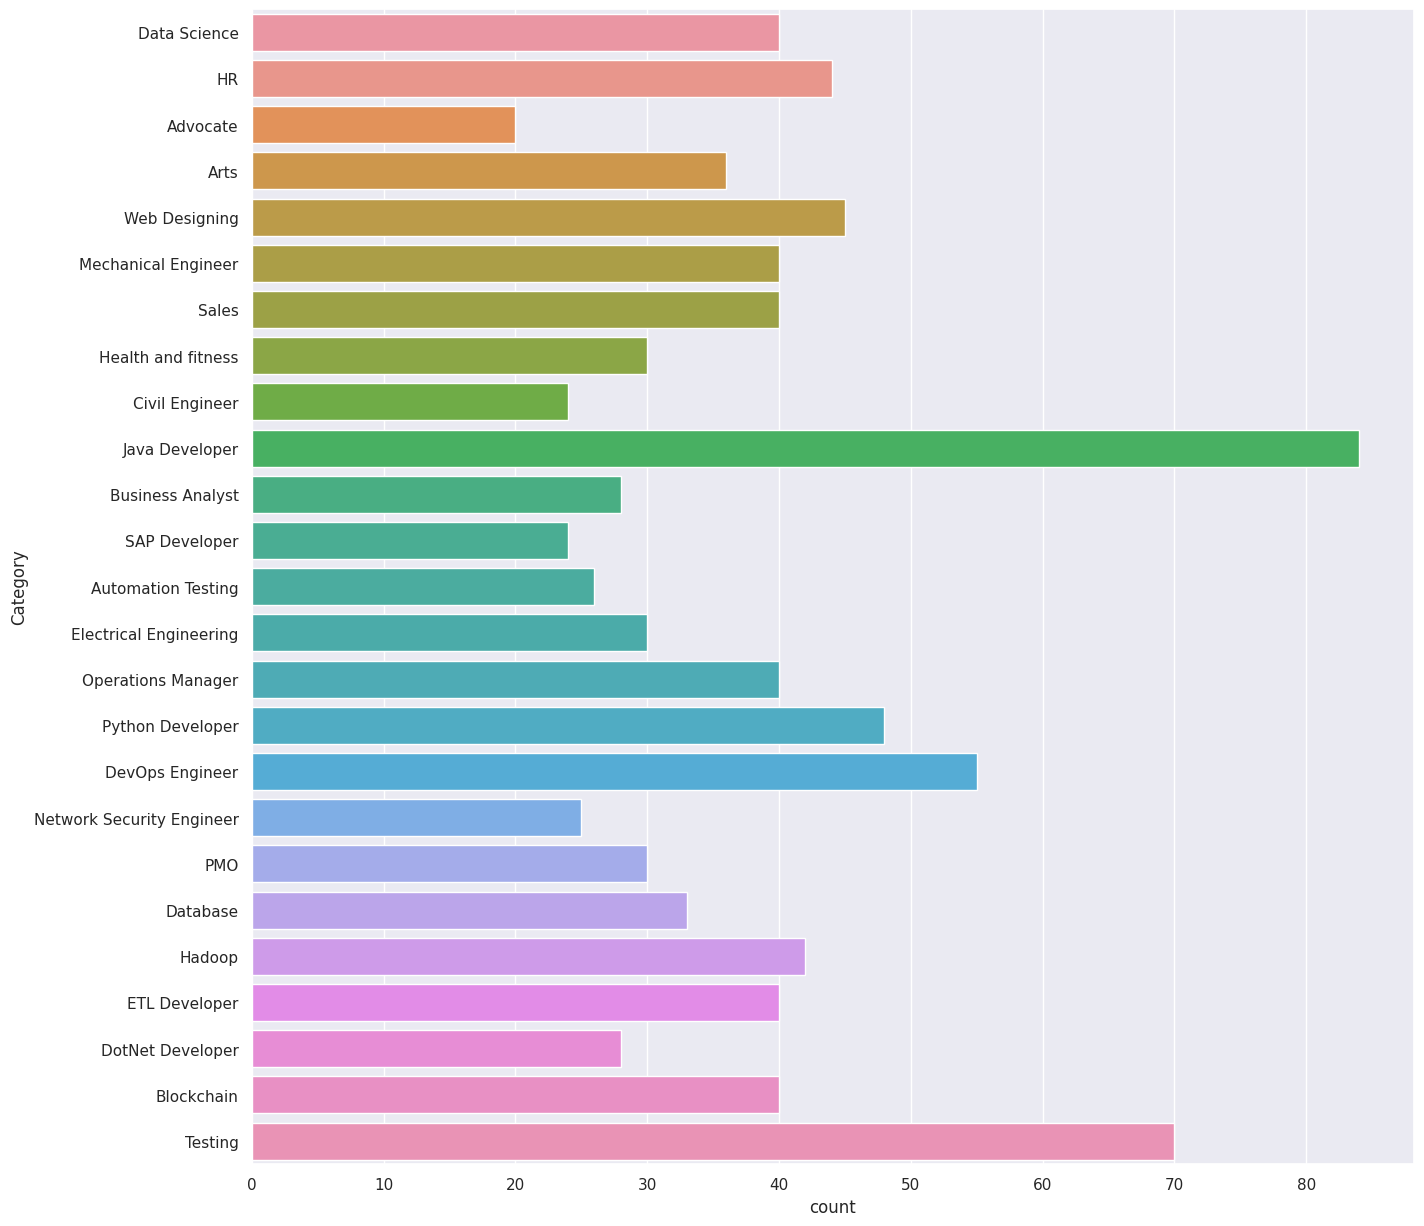

In [9]:
sns.set(rc={'figure.figsize':(15,15)})
val=sns.countplot(y=df["Category"])
fig = val.get_figure()
fig.savefig("out.png") 

In [ ]:
df.Category.unique()

In [ ]:

df["Category"] = df["Category"].str.replace('Sales','Advocate/Sales')
df["Category"] = df["Category"].str.replace('Arts','Other')
df["Category"] = df["Category"].str.replace('Health and fitness','Other')
df["Category"] = df["Category"].str.replace('DotNet Developer','SAP Developer')
df["Category"] = df["Category"].str.replace('SAP Developer','SAP Developer')
df["Category"] = df["Category"].str.replace('Civil Engineer','Engineer')
df["Category"] = df["Category"].str.replace('Engineer','Mechanical Engineer')
df["Category"] = df["Category"].str.replace('Advocate','work')
df["Category"] = df["Category"].str.replace('work','Advocate/Sales')


In [ ]:
df

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(y=df["Category"])

In [ ]:
df.Category.unique()

In [ ]:
all_text = ' '.join(df['Resume'])

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)


Wordcloud before preprocessing 

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df

In [ ]:
import re 


In [14]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def cleanResume(resume):
   # resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
   # resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
   # resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    #resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    #resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
   # resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    #resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    stop_words = set(stopwords.words('english'))
    lines = [] 
    word_list = [] 
    lemmatizer = WordNetLemmatizer()

    resume = resume.lower()
    words=[]
    for word in word_tokenize(resume):
      if word.isalpha():
        if word not in stop_words:
          words.append(lemmatizer.lemmatize(word))
    lines.append(' '.join(words))
    return lines
    '''
    lines = [] 
    word_list = [] 
    st = PorterStemmer()

    for line in resumeText:
        #tokenize the text documents and update the lists word_list and lines
        words=[]
        for word in word_tokenize(line):
            if word.isalpha() and word.lower() not in stop_words:
                words.append(st.stem(word.lower()))
                if st.stem(word.lower()) not in word_list:
                    word_list.append(st.stem(word.lower()))
        lines.append(' '.join(words))'''
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x)[0])

In [16]:
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may data scientist data s...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge point m offi...


In [17]:
all_text = ' '.join(df['cleaned_resume'])

In [18]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)


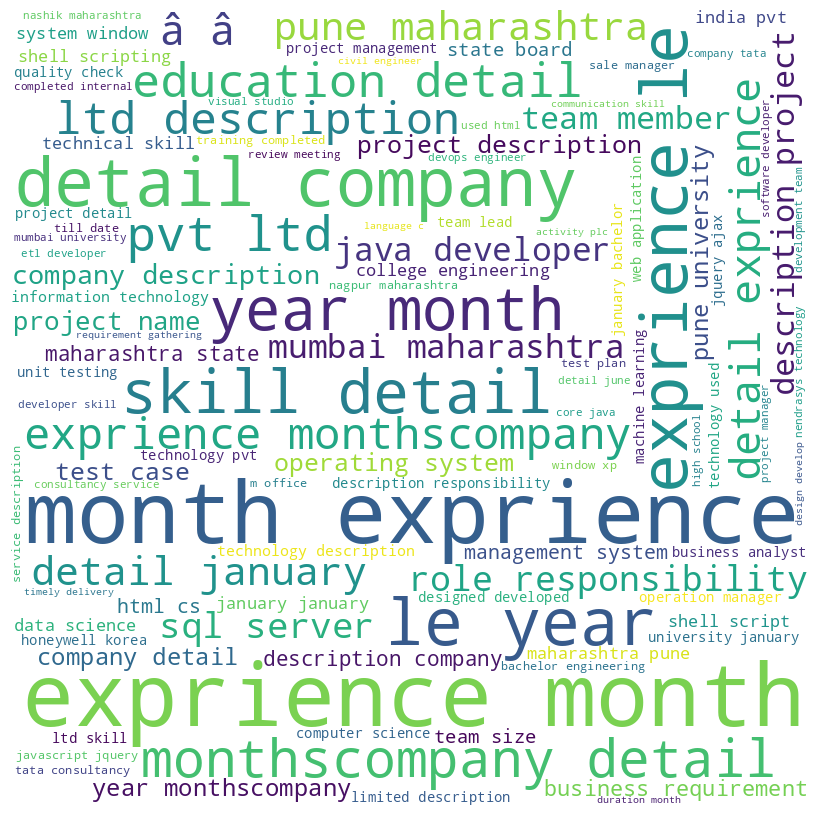

<Figure size 1500x1500 with 0 Axes>

In [21]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show() 
plt.savefig("out.png") 

In [ ]:
df.to_csv("cleaned_resume_final.csv")